In [ ]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
particles_file = "particles_10k.txt"
centers_file = "centers_10k.txt"
counts_file = "counts_10k.txt"
dla_plot_file = "dla_plot_10k.png"
dimension_plot_file = "dimension_plot_10k.png"

particles = pd.read_csv(particles_file, header=None)
centers = pd.read_csv(centers_file, header=None)

In [3]:
last_center = centers.iloc[-1]

In [4]:
def distance(x_center, y_center, x_pos, y_pos):
    return math.sqrt((x_pos - x_center) ** 2 + (y_pos - y_center) ** 2)

In [5]:
dist_centers = []
for i in range(centers.shape[0]):
    dist_centers.append(distance(0.0, 0.0, centers.iloc[i][0], centers.iloc[i][1]))
greatest_center_dist = max(dist_centers)

In [6]:
dist_particles = []
for i in range(particles.shape[0]):
    dist_particles.append(distance(last_center[0], last_center[1], particles.iloc[i][0], particles.iloc[i][1]))
greatest_particle_dist = max(dist_particles)

In [7]:
circle1 = plt.Circle((last_center[0], last_center[1]), int(0.5 + greatest_center_dist * 2.0), color='green', fill=False)
circle2 = plt.Circle((last_center[0], last_center[1]), int(0.5 + greatest_particle_dist / 2.0), color='green', fill=False)
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(15,15)})
sns.scatterplot(particles[0], particles[1],style=3)
sns.lineplot(centers[0], centers[1], color="red")
plt.xlabel("x", size=30)
plt.ylabel("y", size=30)
plt.title("DLA Brownian Tree - %i particles" % particles.shape[0], size=30)
ax.add_artist(circle1)
ax.add_artist(circle2)
fig.savefig(dla_plot_file)


In [8]:
counts = []
for count_radius in np.arange(int(0.5 + 2.0 * greatest_center_dist), int(0.5 * greatest_particle_dist)):
    count = 0
    for dist_particle in  dist_particles:
        if dist_particle <= count_radius:
            count += 1
    counts.append((math.log10(count_radius), math.log10(count)))


DLA fractal dimension =  1.73


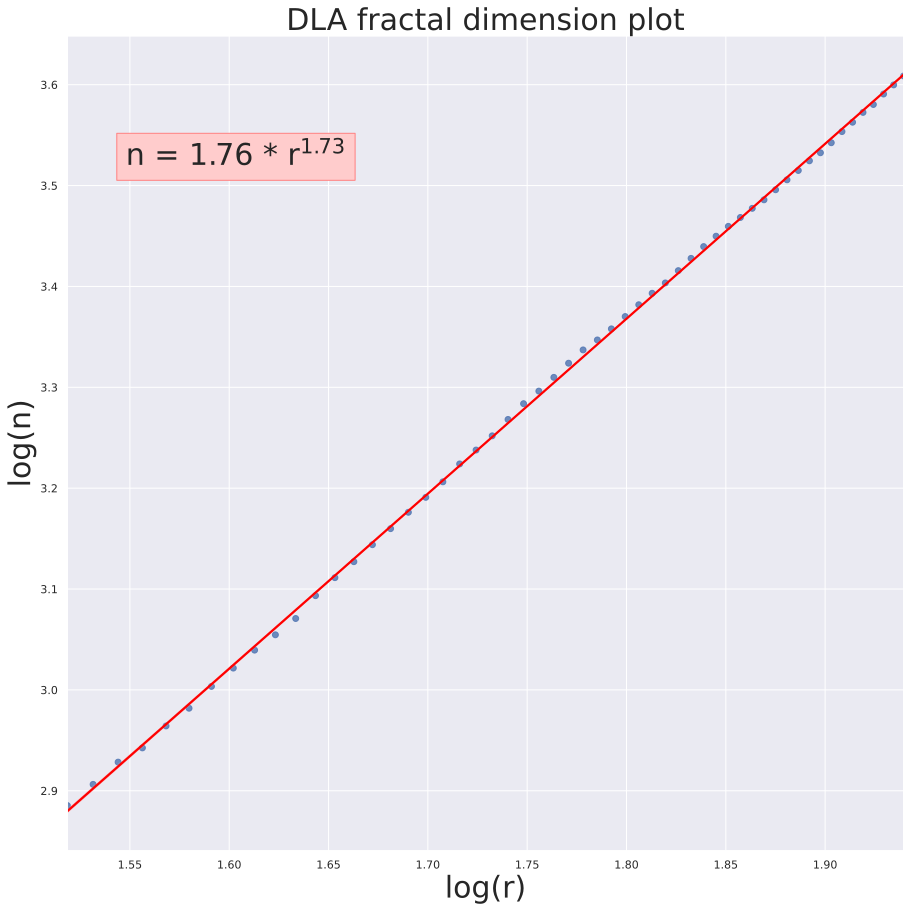

In [9]:
with open(counts_file, 'w') as fp:
    fp.write('\n'.join('%s,%s' % x for x in counts))

df = pd.read_csv(counts_file, header=None)
x = df[0].values.reshape(-1, 1)
y = df[1].values.reshape(-1, 1)

regressor = LinearRegression()  
regressor.fit(x, y)

print("DLA fractal dimension = ", round(regressor.coef_[0][0], 2))


fig, ax = plt.subplots()
plot_text = r"n = %.2f * r$^{%.2f}$" % (10**regressor.intercept_[0], regressor.coef_)
x_plot = min(x) + (max(x) - min(x)) / 3.0

y_plot = max(y) - (max(y) - min(y)) / 11.0
plt.text(x_plot, y_plot, plot_text, size=30,
         ha="right", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
sns.set(rc={'figure.figsize':(15,15)})
sns_plot = sns.regplot(x,y,line_kws={"color": "red"})
plt.xlabel("log(r)", size=30)
plt.ylabel("log(n)", size=30)
plt.title("DLA fractal dimension plot", size=30)
intercept = round(10**regressor.intercept_[0], 2)
fig.savefig(dimension_plot_file)